In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal.windows import blackman, hamming, hann

import eom
import polaritons
import fft

# A comparison of explicit vs implicit

0.21602822186985574
261341878.80780905
20000


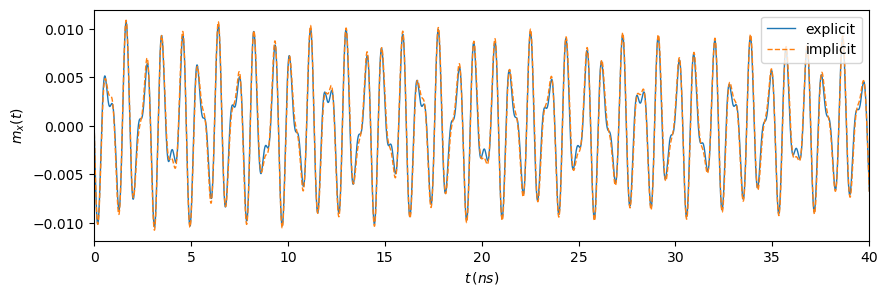

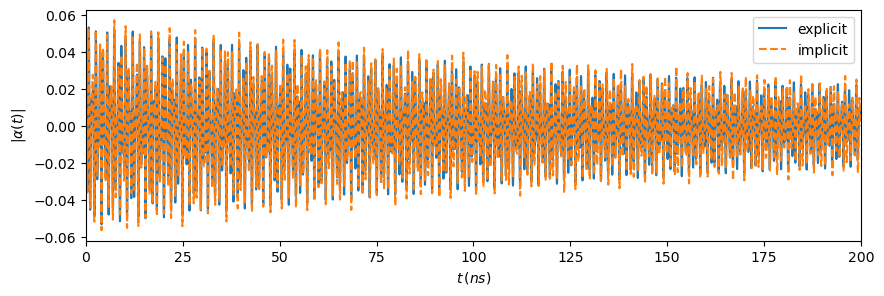

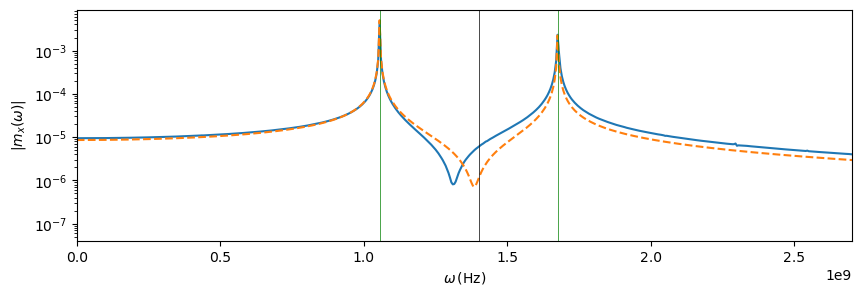

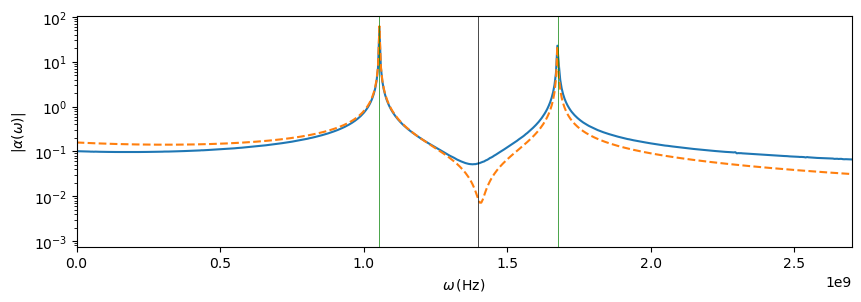

In [125]:
plt.rcParams['figure.figsize'] = (10, 3)

N = 100
tmax = 200e-9 #1000
alpha = 1e-3
my0 = 0.01
m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
alpha0 = 0.5*(m0[3] - 1j*m0[4]) # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2*np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-4 * wc
Bext = np.array([0, 0, 2*np.pi*wz/gammaLL])
nu = 0.25
c = 5.124350564859e-19
rho = 5.1e26 # densidad espines FIJA
lam = np.sqrt(c * rho * nu * wc)
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])
wzc = 4 * lam ** 2 / wc # freq espines critica, calculo indicativo
print(lam / wc)
print(wzc)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax//dt)+1) #100000
print(int(tmax//dt))
#dt = 0.01e-9
#dt = 0.01e-9
sol_exp = solve_ivp(eom.LLG_explicit, (0, tmax), m0, args=(Bext, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha), t_eval=t_eval)#, atol = 1, rtol = 1

# dt = 0.01e-9
eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(eom.LLG_memory, (0, tmax), m0[:-2], args=(Bext, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha, m0[-2:]), t_eval=t_eval, max_step=dt, atol = 1, rtol = 1)


plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], ls='dashed', label='implicit', lw=1)
if wz/wzc < 1:
    plt.axhline(np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary mx
    plt.axhline(-np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary mx

plt.xlim(0, 40)
plt.ylabel(r'$m_x(t)$')
plt.xlabel(r'$t \, (ns)$')
plt.legend()
plt.show()


ms_imp = np.array([sol_imp.y[:3, i] for i in range(len(sol_imp.y[0]))]) # ajusto el formato del vector de magnetizaciones
alphas_imp = eom.f_alpha(ms_imp, sol_imp.t, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha0) # genero el vector de alphas
alphas_exp = 0.5*(sol_exp.y[3] - 1j*sol_exp.y[4])

plt.plot(sol_exp.t * 1e9, np.real(alphas_exp), label='explicit')
plt.plot(sol_imp.t * 1e9, np.real(alphas_imp), ls='dashed', label='implicit')
if wz/wzc < 1:
    plt.axhline(np.sqrt(N)*lam/wc * np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary alpha

plt.xlim(0, 200)
plt.ylabel(r'$|\alpha(t)|$')
plt.xlabel(r'$t \, (ns)$')
plt.legend()
plt.show()

w = hann(len(sol_exp.t))
ws_exp, amps_exp = fft.fft_wrapper(sol_exp.t, sol_exp.y[0])
ws_imp, amps_imp = fft.fft_wrapper(sol_imp.t, sol_imp.y[0]) # slice_=slice(len(sol_exp.t)//2, -1)
pm, pp = polaritons.global_(wz, wc, lam)

amps_exp = 2 * amps_exp / len(sol_exp.t)
amps_imp = 2 * amps_imp / len(sol_imp.t)

plt.plot(ws_exp, np.abs(amps_exp), label = 'explicit')
plt.plot(ws_imp, np.abs(amps_imp), label = 'implicit', ls='dashed')
plt.axvline(pm, c='g', lw=0.5)
plt.axvline(pp, c='g', lw=0.5)
plt.axvline(wc, c='k', lw=0.5)

plt.xlim(0.0e9, 2.7e9)
plt.ylabel('$|m_x(\omega)|$')
plt.xlabel(r'$\omega \, ({\rm Hz})$')
plt.yscale('log')
plt.show()

ws_exp, amps_exp = fft.fft_wrapper(sol_exp.t, alphas_exp)
ws_imp, amps_imp = fft.fft_wrapper(sol_imp.t, alphas_imp) # calculo transformada fourier alphas

plt.plot(ws_exp, np.abs(amps_exp), label = 'explicit')
plt.plot(ws_imp, np.abs(amps_imp), label = 'implicit', ls='dashed')
plt.axvline(pm, c='g', lw=0.5)
plt.axvline(pp, c='g', lw=0.5)
plt.axvline(wc, c='k', lw=0.5)

plt.xlim(0.0e9, 2.7e9)
plt.ylabel(r'$|\alpha(\omega)|$')
plt.xlabel(r'$\omega \, ({\rm Hz})$')
plt.yscale('log')
plt.show()

99999.0


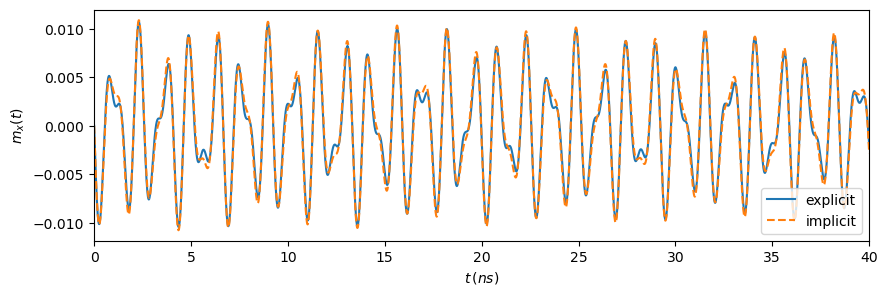

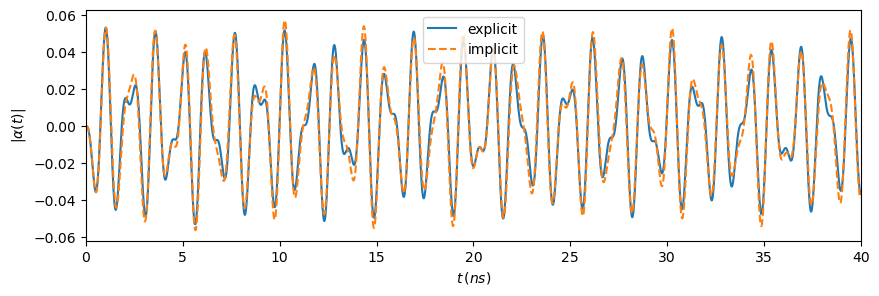

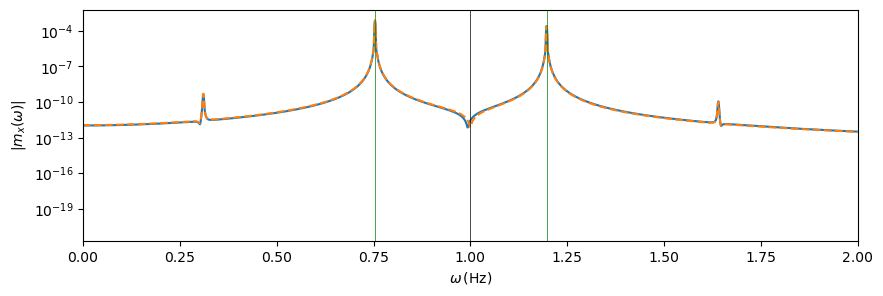

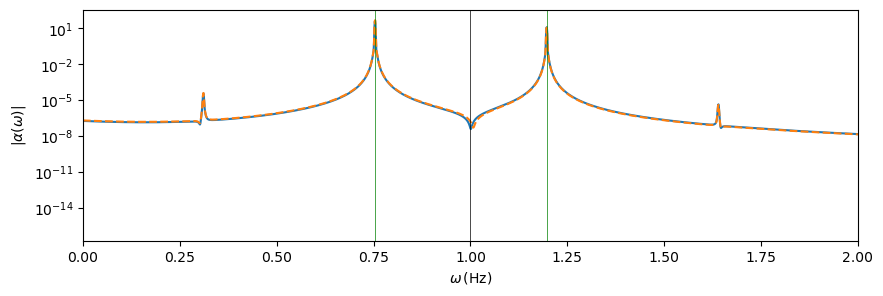

In [127]:
plt.rcParams['figure.figsize'] = (10, 3)

N = 100
tmax = 1000 #1000
alpha = 1e-3
my0 = 0.01
m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
alpha0 = 0.5*(m0[3] - 1j*m0[4]) # fijo alpha0 a partir de x0 y p0
gammaLL = 1
wc = 1
wz = 1 * wc
kappa = 1e-4 * wc
Bext = np.array([0, 0, 2*np.pi*wz/gammaLL])
nu = 0.25
c = 5.124350564859e-19
rho = 5.1e26 # densidad espines FIJA
lam = 0.216
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])
wzc = 4 * lam ** 2 / wc # freq espines critica, calculo indicativo

dt = 0.01
t_eval = np.linspace(0, tmax, int(tmax//dt)) #100000
#dt = 0.01e-9
#dt = 0.01e-9
sol_exp = solve_ivp(eom.LLG_explicit, (0, tmax), m0, args=(Bext, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha), t_eval=t_eval, max_step=dt)#, atol = 1, rtol = 1

# dt = 0.01
print(tmax//dt)
eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(eom.LLG_memory, (0, tmax), m0[:-2], args=(Bext, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha, m0[-2:]), t_eval=t_eval, max_step=dt, atol = 1, rtol = 1)


plt.plot(sol_exp.t, sol_exp.y[0], label='explicit')
plt.plot(sol_imp.t, sol_imp.y[0], ls='dashed', label='implicit')
if wz/wzc < 1:
    plt.axhline(np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary mx
    plt.axhline(-np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary mx

plt.xlim(0, 40)
plt.ylabel(r'$m_x(t)$')
plt.xlabel(r'$t \, (ns)$')
plt.legend()
plt.show()


ms_imp = np.array([sol_imp.y[:3, i] for i in range(len(sol_imp.y[0]))]) # ajusto el formato del vector de magnetizaciones
alphas_imp = eom.f_alpha(ms_imp, sol_imp.t, Brms, 2*np.pi*wc, 2*np.pi*kappa, N, gammaLL, alpha0) # genero el vector de alphas
alphas_exp = 0.5*(sol_exp.y[3] - 1j*sol_exp.y[4])

plt.plot(sol_exp.t, np.real(alphas_exp), label='explicit')
plt.plot(sol_imp.t, np.real(alphas_imp), ls='dashed', label='implicit')
if wz/wzc < 1:
    plt.axhline(np.sqrt(N)*lam/wc * np.sqrt(1 - (wz/wzc)**2), c='k', lw=0.5) # stationary alpha

plt.xlim(0, 40)
plt.ylabel(r'$|\alpha(t)|$')
plt.xlabel(r'$t \, (ns)$')
plt.legend()
plt.show()

w = blackman(len(sol_exp.t))
ws_exp, amps_exp = fft.fft_wrapper(sol_exp.t, sol_exp.y[0]*w)
ws_imp, amps_imp = fft.fft_wrapper(sol_imp.t, sol_imp.y[0]*w) 
pm, pp = polaritons.global_(wz, wc, lam)

amps_exp = 2 * amps_exp / len(sol_exp.t)
amps_imp = 2 * amps_imp / len(sol_imp.t)

plt.plot(ws_exp, np.abs(amps_exp), label = 'explicit')
plt.plot(ws_imp, np.abs(amps_imp), label = 'implicit', ls='dashed')
plt.axvline(pm, c='g', lw=0.5)
plt.axvline(pp, c='g', lw=0.5)
plt.axvline(wc, c='k', lw=0.5)

plt.xlim(0.0, 2)
plt.ylabel('$|m_x(\omega)|$')
plt.xlabel(r'$\omega \, ({\rm Hz})$')
plt.yscale('log')
plt.show()

ws_exp, amps_exp = fft.fft_wrapper(sol_exp.t, alphas_exp*w)
ws_imp, amps_imp = fft.fft_wrapper(sol_imp.t, alphas_imp*w) # calculo transformada fourier alphas

plt.plot(ws_exp, np.abs(amps_exp), label = 'explicit')
plt.plot(ws_imp, np.abs(amps_imp), label = 'implicit', ls='dashed')
plt.axvline(pm, c='g', lw=0.5)
plt.axvline(pp, c='g', lw=0.5)
plt.axvline(wc, c='k', lw=0.5)

plt.xlim(0.0, 2)
plt.ylabel(r'$|\alpha(\omega)|$')
plt.xlabel(r'$\omega \, ({\rm Hz})$')
plt.yscale('log')
plt.show()

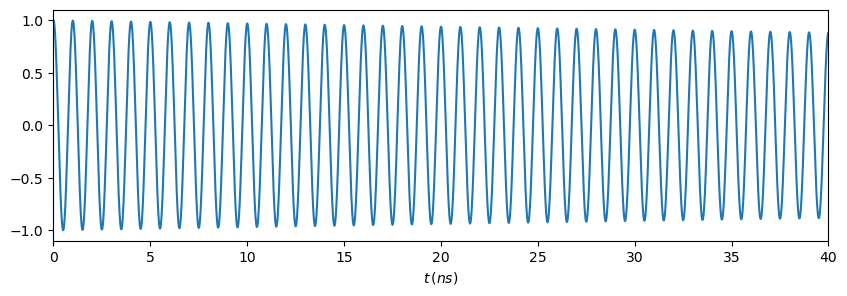

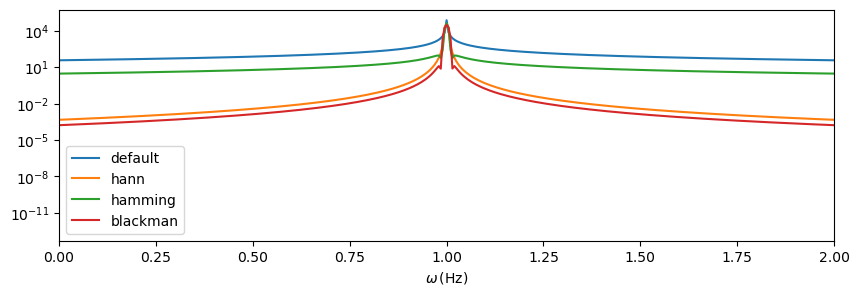

In [108]:
wosc = 1 * (1 + 5e-4j)

ts = np.linspace(0, 200, 100000)

xs = np.exp(1j * 2*np.pi * wosc * ts)

plt.plot(ts, xs.real)
plt.xlim(0, 40)
plt.xlabel(r'$t \, (ns)$')
plt.show()

ws, amps = fft.fft_wrapper(ts, xs)
plt.plot(ws, np.abs(amps), label='default')

w = hann(len(ts))
ws, amps = fft.fft_wrapper(ts, xs*w)
plt.plot(ws, np.abs(amps), label='hann')

w = hamming(len(ts))
ws, amps = fft.fft_wrapper(ts, xs*w)
plt.plot(ws, np.abs(amps), label='hamming')

w = blackman(len(ts))
ws, amps = fft.fft_wrapper(ts, xs*w)
plt.plot(ws, np.abs(amps), label='blackman')


plt.xlim(0, 2)
plt.xlabel(r'$\omega \, ({\rm Hz})$')
plt.yscale('log')
plt.legend()
plt.show()